In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import sys
sys.path.insert(0, "Code/")

%load_ext autoreload

%aimport Search

%autoreload 1

from Search import *


In [2]:
# Generate the data

n = 500
d = 4
scale = 0.05

def gen_linear(n = 100, scale = 0.05):
    x = np.random.uniform(size = (n, d))
    y = x[:, 0] - 2 * x[:, 1] + np.random.normal(scale = scale, size = (n,))
    return x, y

def gen_piecewise(n = 100, scale = 0.05):
    x = np.random.uniform(size = (n, d))
    y = np.zeros((n,))
    for i in range(n):
        if x[i, 0] < 0.5:
            y[i] =  -1 * x[i, 1] + np.random.normal(scale = scale)
        else:
            y[i] =  2 * x[i, 2] + np.random.normal(scale = scale)
    return x, y

def gen_and(n = 100, scale = 0.05):
    x = np.random.uniform(size = (n, d))
    y = np.random.normal(scale = scale, size = (n))
    for i in range(n):
        if x[i, 0] > 0.5 and x[i, 1] > 0.5:
            y[i] += 1
    return x, y


In [3]:
def perturber(model, X, h):
    X_pert = X + h
    y_pert = model.predict(X_pert)
    return X_pert, y_pert

def checker(y, y_pert, min_change = 0.08):
    return 1.0 * (np.abs(y_pert - y) >= min_change)

def learner(X, success):
    region = DecisionTreeClassifier(min_samples_leaf = 8, min_impurity_decrease = 0.05)
    region.fit(X, success)
    return region

def test(mode, min_explainability = 0.8, verbose = False):

    if mode == "linear":
        x, y = gen_linear(n = n, scale = scale)
    elif mode == "piecewise":
        x, y = gen_piecewise(n = n, scale = scale)
    elif mode == "and":
        x, y = gen_and(n = n, scale = scale)

    # Setup the data split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5)
    
    model = RandomForestRegressor(n_estimators = 100)
    model.fit(x_train, y_train)

    print("RMSE: ",  np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

    y_hat_train = model.predict(x_train)
    y_hat_val = model.predict(x_val)
    # Search each individual feature
    for index in range(d):

        print("\nSearching feature ", index)

        # Construct the heuristics
        heuristics = []
        for v in [0.05, -0.05, 0.1, -0.1, 0.2, -0.2, 0.3, -0.3]:
            pert = np.zeros((1, d))
            pert[0, index] = v
            heuristics.append(pert)

        out = search(model, x_train, y_hat_train, heuristics, perturber, checker, learner, use_val = True, X_val = x_val, y_val = y_hat_val, min_explainability = min_explainability, verbose = verbose)
        
        for o in out:
            print(o.heuristic)
            print(np.sum(o.indices))
            plt.figure()
            plot_tree(o.region, filled = True)
            plt.show()
            plt.close()

RMSE:  0.053432525525932105

Searching feature  0

Heuristic:  [[0.05 0.   0.   0.  ]]
Success on Train:  4539.0
Counts:  20461 20461 0 4539
Train Metrics:  [1. 0.]
Rejected


Heuristic:  [[-0.05  0.    0.    0.  ]]
Success on Train:  4606.0
Counts:  20394 20394 0 4606
Train Metrics:  [1. 0.]
Rejected


Heuristic:  [[0.1 0.  0.  0. ]]
Success on Train:  16311.0
Counts:  0 8689 16311 16311
Train Metrics:  [0. 1.]
Rejected


Heuristic:  [[-0.1  0.   0.   0. ]]
Success on Train:  16288.0
Counts:  0 8712 16288 16288
Train Metrics:  [0. 1.]
Rejected


Heuristic:  [[0.2 0.  0.  0. ]]
Success on Train:  22763.0
Counts:  2036 2237 22140 22763
Train Metrics:  [0.91014752 0.97263102]
Success on Val:  11427.0
Validation Metrics:  [0.94967381 0.96989586]
Accepted


Heuristic:  [[-0.2  0.   0.   0. ]]
Success on Train:  22833.0
Counts:  1855 2167 22437 22833
Train Metrics:  [0.85602215 0.98265668]
Success on Val:  11380.0
Validation Metrics:  [0.89464286 0.98488576]
Accepted


Heuristic:  [[0.3 0. 

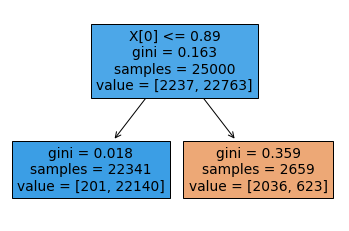

[[-0.2  0.   0.   0. ]]
22833.0


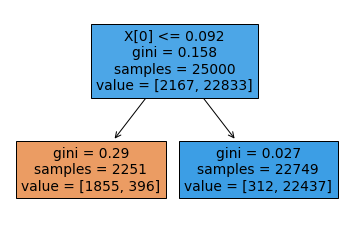

[[0.3 0.  0.  0. ]]
22779.0


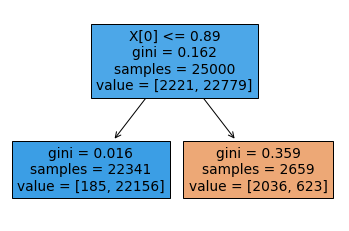

[[-0.3  0.   0.   0. ]]
22843.0


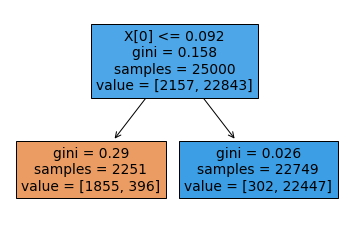


Searching feature  1

Heuristic:  [[0.   0.05 0.   0.  ]]
Success on Train:  16974.0
Counts:  0 8026 16974 16974
Train Metrics:  [0. 1.]
Rejected


Heuristic:  [[ 0.   -0.05  0.    0.  ]]
Success on Train:  17098.0
Counts:  0 7902 17098 17098
Train Metrics:  [0. 1.]
Rejected


Heuristic:  [[0.  0.1 0.  0. ]]
Success on Train:  24019.0
Counts:  0 981 24019 24019
Train Metrics:  [0. 1.]
Rejected


Heuristic:  [[ 0.  -0.1  0.   0. ]]
Success on Train:  23974.0
Counts:  0 1026 23974 23974
Train Metrics:  [0. 1.]
Rejected


Heuristic:  [[0.  0.2 0.  0. ]]
Success on Train:  24031.0
Counts:  0 969 24031 24031
Train Metrics:  [0. 1.]
Rejected


Heuristic:  [[ 0.  -0.2  0.   0. ]]
Success on Train:  23985.0
Counts:  0 1015 23985 23985
Train Metrics:  [0. 1.]
Rejected


All Points Covered

Searching feature  2

Heuristic:  [[0.   0.   0.05 0.  ]]
Success on Train:  0.0

Heuristic:  [[ 0.    0.   -0.05  0.  ]]
Success on Train:  0.0

Heuristic:  [[0.  0.  0.1 0. ]]
Success on Train:  3.0
Counts

In [4]:
test("linear", verbose = True)

RMSE:  0.05309048302198375

Searching feature  0
[[0.2 0.  0.  0. ]]
5079.0


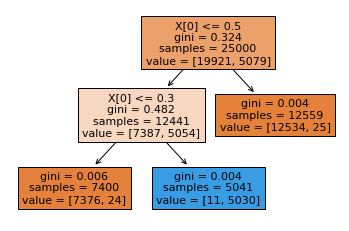

[[-0.2  0.   0.   0. ]]
5135.0


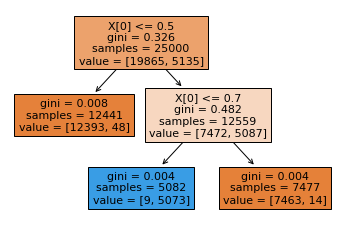

[[0.3 0.  0.  0. ]]
7537.0


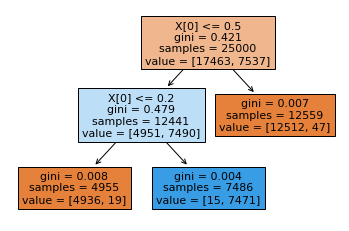

[[-0.3  0.   0.   0. ]]
7629.0


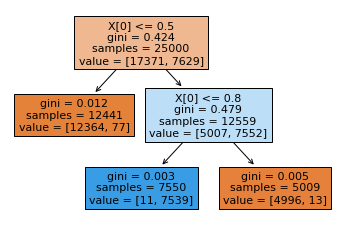


Searching feature  1
[[0.  0.2 0.  0. ]]
11712.0


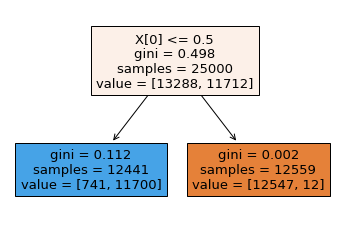

[[ 0.  -0.2  0.   0. ]]
11405.0


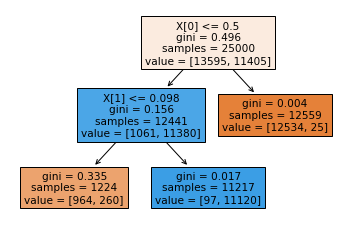

[[0.  0.3 0.  0. ]]
11724.0


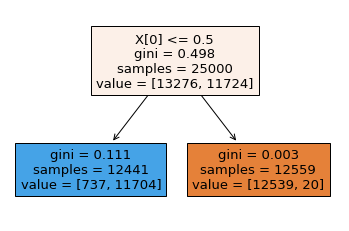

[[ 0.  -0.3  0.   0. ]]
11430.0


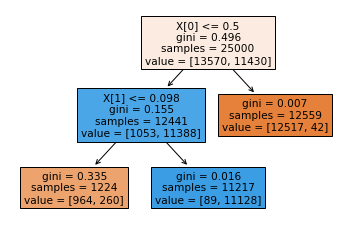


Searching feature  2
[[0.  0.  0.1 0. ]]
12029.0


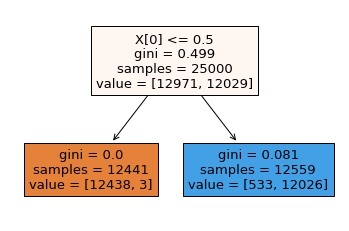

[[ 0.   0.  -0.1  0. ]]
12003.0


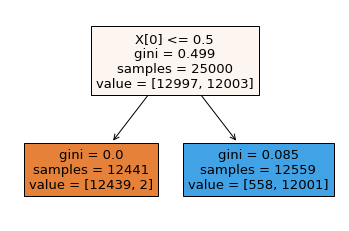

[[0.  0.  0.2 0. ]]
12037.0


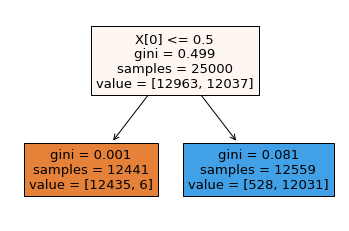

[[ 0.   0.  -0.2  0. ]]
12017.0


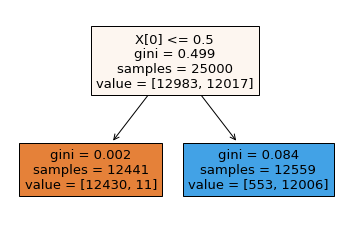

[[0.  0.  0.3 0. ]]
12043.0


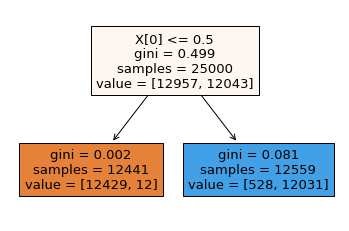

[[ 0.   0.  -0.3  0. ]]
12029.0


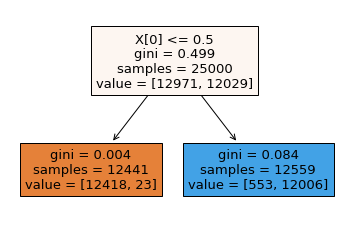


Searching feature  3


In [5]:
test("piecewise")

In [7]:
test("and")

RMSE:  0.05186184672434068

Searching feature  0

Searching feature  1

Searching feature  2

Searching feature  3
